In [1]:
import os
import sys
import numpy as np
import flopy
import matplotlib as mpl
import matplotlib.pyplot as plt

import config

print(sys.version)
print('python executable: {}'.format(sys.executable))
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

flopy is installed in /Users/jdhughes/Documents/Development/flopy_git/flopy_fork/flopy
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/mf2005
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/mfnwt
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/mp7
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/mt3dms
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/mt3dusgs
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/mf6
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/mf6beta
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/gridgen
Executable file found: /Users/jdhughes/Documents/trash/mf6flopy2019_classrep

In [2]:
data_ws = './excsub-data'

In [3]:
model_ws = './excsub-completed'

name = 'csub_subwt'

In [4]:
# temporal discretization
nper = 3
perlen = [1., 21915., 21915.]
nstp = [1, 60, 60]
tsmult = [1., 1., 1.]

In [5]:
# load and process idomain
fpth = os.path.join(data_ws, 'ibc01_ibound.ref')
ib0 = np.genfromtxt(fpth)

In [6]:
# spatial discretization
nlay, nrow, ncol = 4, ib0.shape[0], ib0.shape[1]
shape3d = (nlay, nrow, ncol)
size3d = nlay * nrow * ncol
nactive = np.count_nonzero(ib0) * nlay

In [7]:
delr, delc = 2000., 2000.
top = 150.
botm = [50., -100., -150., -350.]
strt = 100.

In [8]:
ib = []
for k in range(nlay):
    ib.append(ib0.astype(np.int).copy())

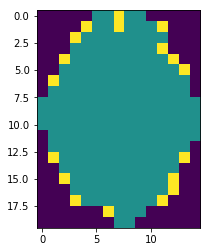

In [9]:
plt.imshow(ib0)

In [10]:
# npf data
laytyp = [1, 0, 0, 0]
hk = [4., 4., 1e-2, 4.]
sy = [0.3, 0., 0., 0.]

In [11]:
# well data
ws1 = [((0, 0, 7), 2.2000000E+03),
       ((0, 1, 4), 2.2000000E+03),
       ((0, 1, 7), 2.2000000E+03),
       ((0, 1, 11), 2.2000000E+03),
       ((0, 2, 3), 2.2000000E+03),
       ((0, 3, 11), 2.2000000E+03),
       ((0, 4, 2), 2.2000000E+03),
       ((0, 4, 12), 2.2000000E+03),
       ((0, 5, 13), 2.2000000E+03),
       ((0, 6, 1), 2.2000000E+03),
       ((0, 13, 1), 2.2000000E+03),
       ((0, 13, 13), 2.2000000E+03),
       ((0, 15, 2), 2.2000000E+03),
       ((0, 15, 12), 2.2000000E+03),
       ((0, 16, 12), 2.2000000E+03),
       ((0, 17, 3), 2.2000000E+03),
       ((0, 17, 11), 2.2000000E+03),
       ((0, 18, 6), 2.2000000E+03)]
ws2 = [((0, 0, 7), 2.2000000E+03),
       ((0, 1, 4), 2.2000000E+03),
       ((0, 1, 7), 2.2000000E+03),
       ((0, 1, 11), 2.2000000E+03),
       ((0, 2, 3), 2.2000000E+03),
       ((0, 3, 11), 2.2000000E+03),
       ((0, 4, 2), 2.2000000E+03),
       ((0, 4, 12), 2.2000000E+03),
       ((0, 5, 13), 2.2000000E+03),
       ((0, 6, 1), 2.2000000E+03),
       ((0, 13, 1), 2.2000000E+03),
       ((0, 13, 13), 2.2000000E+03),
       ((0, 15, 2), 2.2000000E+03),
       ((0, 15, 12), 2.2000000E+03),
       ((0, 16, 12), 2.2000000E+03),
       ((0, 17, 3), 2.2000000E+03),
       ((0, 17, 11), 2.2000000E+03),
       ((0, 18, 6), 2.2000000E+03),
       ((1, 8, 9), -7.2000000E+04),
       ((3, 11, 6), -7.2000000E+04)]
wd6 = {0: ws1, 1: ws2, 2: ws1}

In [12]:
# constant head data
chd6 = [((0, 19, 7), 100.00000),
        ((0, 19, 8), 100.00000),
        ((1, 19, 7), 100.00000),
        ((1, 19, 8), 100.00000),
        ((2, 19, 7), 100.00000),
        ((2, 19, 8), 100.00000),
        ((3, 19, 7), 100.00000),
        ((3, 19, 8), 100.00000)]
cd6 = {0: chd6}

In [13]:
# ims parameters
nouter, ninner = 100, 300
hclose, rclose, relax = 1e-6, 0.01, 0.97
fluxtol = nactive * rclose

In [14]:
# tdis data
tdis_rc = []
for idx in range(nper):
    tdis_rc.append((perlen[idx], nstp[idx], tsmult[idx]))

In [15]:
# subwt data
cc = 0.25
cr = 0.01
void = 0.82
theta = void / (1. + void)
kv = 999.
sgm = 1.7
sgs = 2.0
ini_stress = 15.0
delay_flag = 0
thick = [45., 70., 50., 90.]
gs0 = 0.
ump = None

In [16]:
zthick = [top - botm[0],
          botm[0] - botm[1],
          botm[1] - botm[2],
          botm[2] - botm[3]]

beta = 0.
# beta = 4.65120000e-10
gammaw = 9806.65000000
sw = beta * gammaw * theta
ss = [sw for k in range(nlay)]

In [17]:
swt6 = []
csubno = 0
for k in range(nlay):
    for i in range(nrow):
        for j in range(ncol):
            iactive = 0
            if ib0[i, j] > 0:
                iactive = 1
            if i == 19 and (j == 7 or j == 8):
                iactive = 0
            if iactive > 0:
                tag = '{:02d}_{:02d}_{:02d}'.format(k + 1, i + 1, j + 1)
                csubno += 1
                d = [csubno, (k, i, j), 'nodelay', ini_stress, thick[k],
                     1., cc, cr, theta,
                     kv, 999., tag]
                swt6.append(d)

In [18]:
# build MODFLOW 6 files
sim = flopy.mf6.MFSimulation(sim_name=name,
                             exe_name=config.mf6betaexe,
                             sim_ws=model_ws)
# create tdis package
tdis = flopy.mf6.ModflowTdis(sim, time_units='DAYS',
                             nper=nper, perioddata=tdis_rc)

# create gwf model
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, save_flows=True,
                           newtonoptions='')

# create iterative model solution and register the gwf model with it
ims = flopy.mf6.ModflowIms(sim, print_option='SUMMARY',
                           outer_hclose=hclose,
                           outer_maximum=nouter,
                           under_relaxation='NONE',
                           inner_maximum=ninner,
                           inner_hclose=hclose, rcloserecord=rclose,
                           linear_acceleration='BICGSTAB',
                           scaling_method='NONE',
                           reordering_method='NONE',
                           relaxation_factor=relax)
sim.register_ims_package(ims, [gwf.name])

dis = flopy.mf6.ModflowGwfdis(gwf, nlay=nlay, nrow=nrow, ncol=ncol,
                              delr=delr, delc=delc,
                              top=top, botm=botm,
                              idomain=ib,
                              filename='{}.dis'.format(name))

# initial conditions
ic = flopy.mf6.ModflowGwfic(gwf, strt=strt,
                            filename='{}.ic'.format(name))

# node property flow
npf = flopy.mf6.ModflowGwfnpf(gwf, save_flows=False,
                              icelltype=laytyp,
                              k=hk,
                              k33=hk)
# storage
sto = flopy.mf6.ModflowGwfsto(gwf, save_flows=False, iconvert=laytyp,
                              ss=0., sy=sy,
                              steady_state={0: True},
                              transient={1: True})

# chd files
chd = flopy.mf6.modflow.mfgwfchd.ModflowGwfchd(gwf,
                                               maxbound=len(chd6),
                                               stress_period_data=cd6,
                                               save_flows=False)

# wel files
wel = flopy.mf6.ModflowGwfwel(gwf, print_input=True, print_flows=True,
                              maxbound=len(ws2),
                              stress_period_data=wd6,
                              save_flows=False)

# csub files
gg = []
for i in range(nrow):
    for j in range(ncol):
        if ib0[i, j] > 0:
            gg.append([(0, i, j), gs0])
sig0 = {0: gg}
opth = '{}.csub.obs'.format(name)
csub = flopy.mf6.ModflowGwfcsub(gwf,
                                # interbed_stress_offset=True,
                                boundnames=True,
                                compression_indices=True,
                                update_material_properties=ump,
                                time_weight=0.,
                                ninterbeds=len(swt6),
                                sgs=sgs, sgm=sgm,
                                beta=beta,
                                gammaw=gammaw,
                                ske_cr=0.,
                                sk_theta=theta,
                                packagedata=swt6,
                                maxsig0=len(gg),
                                stress_period_data=sig0)
orecarray = {}
orecarray['csub_obs.csv'] = [('w1l1', 'interbed-compaction', '01_09_10'),
                             ('w1l2', 'interbed-compaction', '02_09_10'),
                             ('w1l3', 'interbed-compaction', '03_09_10'),
                             ('w1l4', 'interbed-compaction', '04_09_10'),
                             ('w2l1', 'interbed-compaction', '01_12_07'),
                             ('w2l2', 'interbed-compaction', '02_12_07'),
                             ('w2l3', 'interbed-compaction', '03_12_07'),
                             ('w2l4', 'interbed-compaction', '04_12_07'),
                             ('w2l4q', 'csub-cell', (3, 11, 6))]
csub_obs_package = csub.obs.initialize(filename=opth, digits=10,
                                       print_input=True,
                                       continuous=orecarray)

# output control
oc = flopy.mf6.ModflowGwfoc(gwf,
                            budget_filerecord='{}.cbc'.format(name),
                            head_filerecord='{}.hds'.format(name),
                            headprintrecord=[
                                ('COLUMNS', 10, 'WIDTH', 15,
                                 'DIGITS', 6, 'GENERAL')],
                            saverecord=[('HEAD', 'ALL'),
                                        ('BUDGET', 'ALL')],
                            printrecord=[('HEAD', 'LAST'),
                                         ('BUDGET', 'ALL')])

In [19]:
# write input files
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims_-1...
  writing model csub_subwt...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
    writing package wel...
    writing package csub...
    writing package obs_0...
    writing package oc...


In [20]:
# run the simulation
sim.run_simulation()

FloPy is using the following  executable to run the model: /Users/jdhughes/Documents/trash/mf6flopy2019_classrepo/exercises/bin/macos/mf6beta
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                          VERSION 6.0.4.144 03/20/2019
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Mar 25 2019 08:18:29 with IFORT compiler (ver. 19.0.0)

This software is preliminary or provisional and is subject to 
revision. It is being provided to meet the need for timely best 
science. The software has not received final approval by the U.S. 
Geological Survey (USGS). No warranty, expressed or implied, is made 
by the USGS or the U.S. Government as to the functionality of the 
software and related material nor shall the fact of release 
constitute any such warranty. The software is provided on the 
condition that neither the USGS nor the U.S. Government shall be held 
liable for any damages resulting from 

(True, [])

### Process the model files

In [21]:
levels = [i for i in range(100, 130, 2)]
masked_values = [1e30]

In [22]:
fpth = os.path.join(model_ws, name + '.hds')
hobj = flopy.utils.HeadFile(fpth)
times = hobj.get_times()

In [23]:
tidx = -1
h = hobj.get_data(totim=times[tidx])
h.max()

1e+30

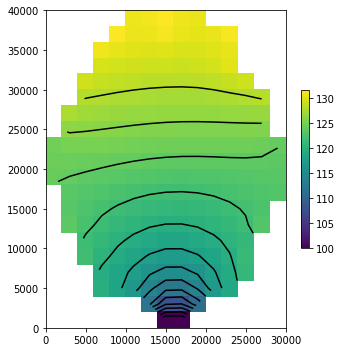

In [24]:
k = 1
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
mm = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=k)
c = mm.plot_array(h, masked_values=masked_values)
mm.contour_array(h, masked_values=masked_values, 
                 levels=levels, colors='black')
plt.colorbar(c, shrink=0.5, ax=ax)
plt.tight_layout()

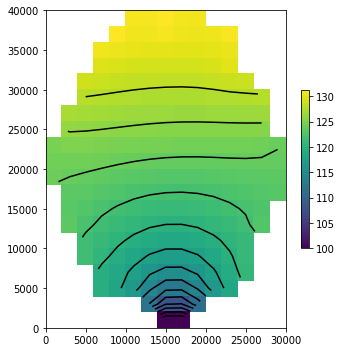

In [25]:
k = 2
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
mm = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=k)
c = mm.plot_array(h, masked_values=masked_values)
mm.contour_array(h, masked_values=masked_values, 
                 levels=levels, colors='black')
plt.colorbar(c, shrink=0.5, ax=ax)
plt.tight_layout()

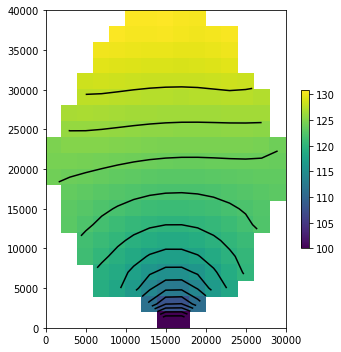

In [26]:
k = 3
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
mm = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=k)
c = mm.plot_array(h, masked_values=masked_values)
mm.contour_array(h, masked_values=masked_values, 
                 levels=levels, colors='black')
plt.colorbar(c, shrink=0.5, ax=ax)
plt.tight_layout()

In [27]:
# get ts at location of largest pumping well and subsidence observation location
cid = [(1, 8, 9), (3, 11, 6)]
o1 = hobj.get_ts(cid)

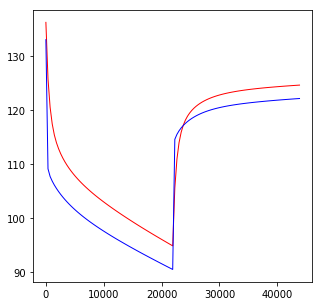

In [28]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
ax.plot(o1[:,0], o1[:,1], lw=1, color='red');
ax.plot(o1[:,0], o1[:,2], lw=1, color='blue');

### Summary of compaction results

In [29]:
# MODFLOW 6 total compaction results
fpth = os.path.join(model_ws, 'csub_obs.csv')
mf6o = np.genfromtxt(fpth, names=True, delimiter=',')    

In [30]:
t = mf6o['time'] / 365.25

In [31]:
print('Well 1')
print('layer 1', mf6o['W1L1'].max())
print('layer 2', mf6o['W1L2'].max())
print('layer 3', mf6o['W1L3'].max())
print('layer 4', mf6o['W1L4'].max())

Well 1
layer 1 0.2123499849
layer 2 0.2959303902
layer 3 0.06471047484
layer 4 0.006666947813


In [32]:
print('Well 2')
print('layer 1', mf6o['W2L1'].max())
print('layer 2', mf6o['W2L2'].max())
print('layer 3', mf6o['W2L3'].max())
print('layer 4', mf6o['W2L4'].max())

Well 2
layer 1 0.04905182247
layer 2 0.05734899337
layer 3 0.1142412524
layer 4 0.2600780802


### Well 1

In [33]:
m6w1l1 = mf6o['W1L1'] + mf6o['W1L2'] + mf6o['W1L3'] + mf6o['W1L4']
m6w1l2 = mf6o['W1L2'] + mf6o['W1L3'] + mf6o['W1L4']
m6w1l3 = mf6o['W1L3'] + mf6o['W1L4']
m6w1l4 = mf6o['W1L4']

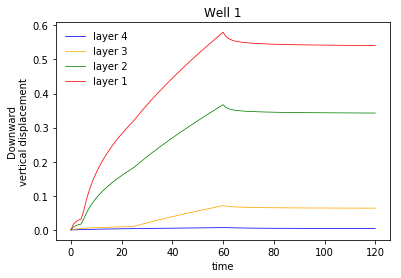

In [34]:
plt.plot(t, m6w1l4, color='blue', lw=0.75, label='layer 4')
plt.plot(t, m6w1l3, color='orange', lw=0.75, label='layer 3')
plt.plot(t, m6w1l2, color='green', lw=0.75, label='layer 2')
plt.plot(t, m6w1l1, color='red', lw=0.75, label='layer 1')
plt.legend(frameon=False)
plt.title('Well 1')
plt.xlabel('time')
plt.ylabel('Downward\nvertical displacement');
#plt.ylim(0,0.7);

### Well 2

In [35]:
m6w2l1 = mf6o['W2L1'] + mf6o['W2L2'] + mf6o['W2L3'] + mf6o['W2L4']
m6w2l2 = mf6o['W2L2'] + mf6o['W2L3'] + mf6o['W2L4']
m6w2l3 = mf6o['W2L3'] + mf6o['W2L4']
m6w2l4 = mf6o['W2L4']

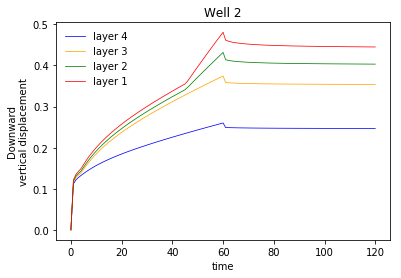

In [36]:
plt.plot(t, m6w2l4, color='blue', lw=0.75, label='layer 4')
plt.plot(t, m6w2l3, color='orange', lw=0.75, label='layer 3')
plt.plot(t, m6w2l2, color='green', lw=0.75, label='layer 2')
plt.plot(t, m6w2l1, color='red', lw=0.75, label='layer 1')
plt.legend(frameon=False)
plt.title('Well 2')
plt.xlabel('time')
plt.ylabel('Downward\nvertical displacement');
#plt.ylim(0,0.7);